In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import sklearn.metrics as metrics 
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt

In [2]:

with open('Dating_app_feat_eng.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   genderLooking           4008 non-null   category
 1   age                     4008 non-null   int64   
 2   name                    4008 non-null   category
 3   counts_details          4008 non-null   float64 
 4   counts_pictures         4008 non-null   int64   
 5   counts_profileVisits    4008 non-null   int64   
 6   counts_kisses           4008 non-null   int64   
 7   counts_fans             4008 non-null   float64 
 8   counts_g                4008 non-null   category
 9   flirtInterests_chat     4008 non-null   int64   
 10  flirtInterests_friends  4008 non-null   int64   
 11  flirtInterests_date     4008 non-null   int64   
 12  country                 4008 non-null   category
 13  city 

In [4]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res

In [5]:
df.head()

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_de,lang_it,lang_es,lang_pt,isVerified,shareProfileEnabled,hasBirthday,crypt,lastOnlineday,lastOnlinemonth
userId,,,,,,,,,,,,,,,,,,,,,
4e3842f79b70e7ea57000064,1,25,2078,1.00,4,8279,239,0.0,3.0,1,...,1,0,0,0,0,1.0,0,0.0,25,4
4e3d34bf5d2bce7b160006a3,1,22,2202,0.85,5,663,13,0.0,0.0,1,...,1,1,0,0,0,1.0,0,0.0,26,4
4ec96c090dc82cb25d00000a,1,21,931,0.00,4,1369,88,0.0,2.0,0,...,0,0,0,0,0,1.0,0,0.0,4,6
4eef8b81ebf2c8f64000000c,3,20,1470,0.12,3,22187,1015,2.0,3.0,1,...,0,0,0,0,0,1.0,0,0.0,4,7
4ef3cc5aa9d0b3d07d000017,1,21,2608,0.15,12,35262,1413,9.0,12.0,1,...,1,0,0,0,0,1.0,0,0.0,4,6


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

In [7]:
X = df.drop(columns='counts_profileVisits')
y=df['counts_profileVisits']


In [8]:
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)

pred1_pos = np.maximum(pred1, 0)

In [9]:
regressionMetrics(y, pred1_pos)

{'MSE': 8679632.398608357,
 'RMSE': 2946.1215858494975,
 'MAE': 1481.8930751973467,
 'RMSLE': 1.7648518458213658}

In [10]:
models_list = pd.DataFrame()
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred1_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852


<AxesSubplot:xlabel='counts_profileVisits'>

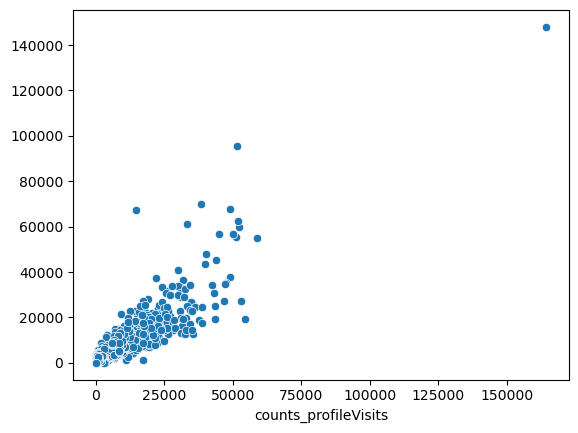

In [11]:
sns.scatterplot(x=y, y=pred1_pos)

In [12]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [13]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113


In [14]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

In [15]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933


In [16]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)

AdaBoostRegressor(random_state=1)

In [17]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933


In [18]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

GradientBoostingRegressor(random_state=1)

In [19]:
pred5 = mod5.predict(X)
pred5_pos= np.maximum(pred5, 0)
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred5_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272


In [20]:
mod6 = SVR()
mod6.fit(X,y)

SVR()

In [21]:
pred6 = mod6.predict(X)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272
5,SVM,5.245876e+07,7242.841765,3229.519744,1.895035


In [22]:
mod7= xgb.XGBRegressor(enable_categorical=True)
mod7.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
pred7 = mod7.predict(X)
pred7_pos= np.maximum(pred7, 0)
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred7_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272
5,SVM,5.245876e+07,7242.841765,3229.519744,1.895035
6,XGB,1.665578e+02,12.905729,4.580172,0.160272


In [24]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
6,XGB,1.665578e+02,12.905729,4.580172,0.160272
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
5,SVM,5.245876e+07,7242.841765,3229.519744,1.895035


In [25]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [27]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.1514200694627081


In [28]:
grid_search = GridSearchCV(estimator=mod7, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\Galis\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:54:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (MSE): 28027044.222476438


In [29]:
print("Best Score (RMSLE):", grid_search.best_score_)

Best Score (RMSLE): 28027044.222476438


In [32]:
pred8 = grid_search.predict(X)
pred8_pos= np.maximum(pred8, 0)
model_dict = {'model': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred8_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,8.679632e+06,2946.121586,1481.893075,1.764852
1,Decision Tree,8.649368e-03,0.093002,0.002828,0.000113
2,RandomForest,1.462626e+06,1209.390783,450.500149,0.459933
3,ADABoost,1.462626e+06,1209.390783,450.500149,0.459933
4,GBM,3.343337e+06,1828.479550,975.609648,1.101272
5,SVM,5.245876e+07,7242.841765,3229.519744,1.895035
6,XGB,1.665578e+02,12.905729,4.580172,0.160272
7,XGB_FT,1.541069e+07,3925.645180,552.985662,0.507782


In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=222)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=222)

In [34]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mae = 100 * np.mean(errors)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(np.mean(errors)))
    return mae

In [43]:
from xgboost import XGBRegressor

base_model = XGBRegressor(enable_categorical=True,
                 max_depth=20,
                 colsample_bytree=1.0,
                 min_child_weight=4,
                 gamma=0,
                 n_estimators=5)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_temp, y_temp)

Model Performance
Mean Absolute Error: 1416.7915


In [45]:
predictions = base_model.predict(X_test)

In [49]:
print(predictions)

[ 4544.05      783.88153 12089.363   19675.906    5312.7954   1010.5582
  3076.2478    847.5688    783.88153   737.94      847.5688   1729.6187
  8673.971    1671.1556   4906.4272   3754.5664   1847.606    2609.2588
  1534.7725   1932.1871   8508.924    1597.5771   1219.2826   3964.2517
  5337.46     2633.6492   1116.7764   1312.7701    701.86847   847.5688
  3325.2236   3629.1453   1372.0164  28573.217    1173.0006   6901.4287
  4612.425     833.5412   9282.051     891.1039   3795.2654   2893.0627
  1753.9036    735.7054    701.86847  6463.7114   4078.209    3721.2217
   735.7054    833.5412   1702.9701   1619.1832   1769.5417   5217.192
 11043.826    1465.5151   1344.4647  10642.411    1006.33606  1120.8125
  2238.13     2356.9639   2584.1936   1467.5745   1897.0304   1906.884
  1195.6656  21666.584    3421.5874  14483.762    1169.6562    833.5412
  4462.2656   1052.888    2816.8384   4661.354    2663.4868  22312.91
  2232.5325    833.5412   4653.376    1104.0258    737.94     5139.8

In [89]:
feature_importance = base_model.feature_importances_


In [91]:
features_df = pd.DataFrame({
    'Feature': X.columns,   # Assuming X contains your feature columns
    'Importance': feature_importance
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(features_df)

                   Feature  Importance
5            counts_kisses    0.508112
7                 counts_g    0.148462
13            locationCity    0.093851
24                 lang_de    0.072314
22                 lang_fr    0.027167
23                 lang_en    0.014039
14                distance    0.012338
32           lastOnlineday    0.011779
25                 lang_it    0.011254
6              counts_fans    0.010512
12                    city    0.008645
17                isMobile    0.007659
3           counts_details    0.006945
11                 country    0.006576
33         lastOnlinemonth    0.006373
9   flirtInterests_friends    0.006028
19                isOnline    0.005415
21              lang_count    0.005333
1                      age    0.005224
18                   isNew    0.005123
10     flirtInterests_date    0.005123
4          counts_pictures    0.004781
28              isVerified    0.004718
29     shareProfileEnabled    0.004103
8      flirtInterests_cha

In [69]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

In [70]:
print(results_df)

                          Actual     Predicted
userId                                        
53fc65e3c56da144768b46b4    8741   4544.049805
552113c0150ba0a84d8b499e     112    783.881531
5356f6f2ca6da1a5798b4787    8741  12089.363281
51d97722c66da1cd3ab30658   25724  19675.906250
53e7a759c76da1f41d8b456a    6123   5312.795410
...                          ...           ...
54f0fe53c96da1d60f8b45c3    2793   1195.665649
55198e8d0a6ea17a548b48b1     449   1363.515625
54e0c2f5c46da1d3208b47ec    2435   2141.023193
527257e0160ba0bc0e260876   19018  15740.696289
54fe1ec3c96da1f9668b4ba5    1259   2685.010742

[602 rows x 2 columns]


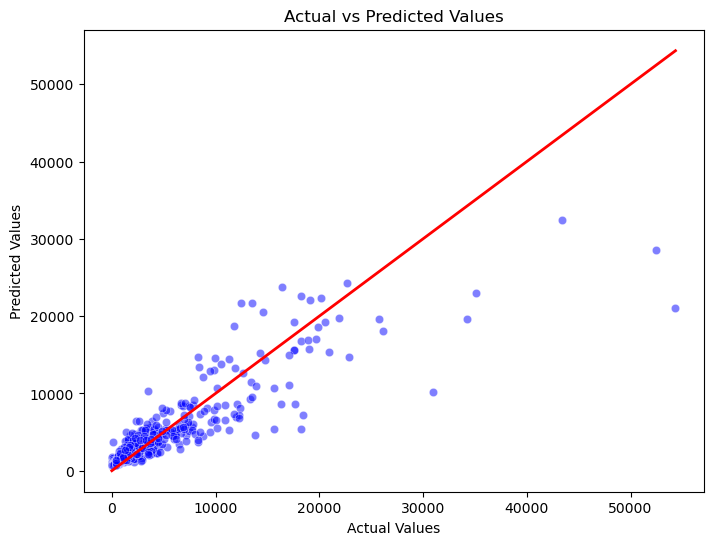

In [72]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', alpha=0.5)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [83]:
df['ProfileVisitRange'] = pd.cut(df['counts_profileVisits'], 
                                 bins=[0, low_threshold, medium_threshold, high_threshold], 
                                 labels=['Not popular', 'Popular', 'Very Popular'], 
                                 include_lowest=True)

dev_predictions = base_model.predict(X)



In [84]:
# Create a new column for ProfileVisitRating based on actual values
df['ProfileVisitRating_Actual'] = pd.cut(df['counts_profileVisits'], 
                                         bins=[0, low_threshold, medium_threshold, high_threshold], 
                                         labels=['Not popular', 'Popular', 'Very Popular'], 
                                         include_lowest=True)

# Create a new column for ProfileVisitRating based on predicted values
df['ProfileVisitRating_Predicted'] = pd.cut(dev_predictions, 
                                            bins=[0, low_threshold, medium_threshold, high_threshold], 
                                            labels=['Not popular', 'Popular', 'Very Popular'], 
                                            include_lowest=True)

# Create the DataFrame with actual, predicted, and rating columns
results_df = df.copy()  # Copy the original DataFrame to keep all columns
results_df['Actual'] = y  # Assuming y contains the actual target values
results_df['Predicted'] = dev_predictions

# Display the DataFrame
print(results_df.head())

                         genderLooking  age  name  counts_details  \
userId                                                              
4e3842f79b70e7ea57000064             1   25  2078            1.00   
4e3d34bf5d2bce7b160006a3             1   22  2202            0.85   
4ec96c090dc82cb25d00000a             1   21   931            0.00   
4eef8b81ebf2c8f64000000c             3   20  1470            0.12   
4ef3cc5aa9d0b3d07d000017             1   21  2608            0.15   

                          counts_pictures  counts_profileVisits  \
userId                                                            
4e3842f79b70e7ea57000064                4                  8279   
4e3d34bf5d2bce7b160006a3                5                   663   
4ec96c090dc82cb25d00000a                4                  1369   
4eef8b81ebf2c8f64000000c                3                 22187   
4ef3cc5aa9d0b3d07d000017               12                 35262   

                          counts_kisses  count

In [92]:
results_df.ProfileVisitRating_Predicted.value_counts()

Popular         2553
Very Popular    1455
Not popular        0
Name: ProfileVisitRating_Predicted, dtype: int64

In [93]:
results_df.ProfileVisitRating_Actual.value_counts()

Popular         1362
Not popular     1323
Very Popular    1323
Name: ProfileVisitRating_Actual, dtype: int64

In [94]:
top_50_df = results_df.sort_values(by='counts_profileVisits', ascending=False).head(50)
print(top_50_df)

                         genderLooking  age  name  counts_details  \
userId                                                              
519f8018140ba0df4000015b             1   23    38            1.00   
522703b9180ba0c41654d0ba             1   23   972            0.77   
50d89ab12d15de7c73000019             1   22   304            0.81   
50b48af7c76da15a65000048             1   25  1545            0.77   
510acfd738a89cb663000008             1   21  2237            0.27   
53d9ea69ca6da106408b4740             1   21   569            1.00   
50f9099d90c8fd99540000e6             1   20  1773            0.92   
505e2cb5883fa927490000de             1   24  1837            0.85   
5129f04d170ba02764000135             1   23   703            0.62   
51989e08c86da19a700003f5             1   20  1204            0.42   
50d5af6a1b0ba0096e000018             1   19  2308            0.62   
5165df621c0ba00d680007e6             1   22     0            0.81   
533633c9160ba0643c8b49cd          

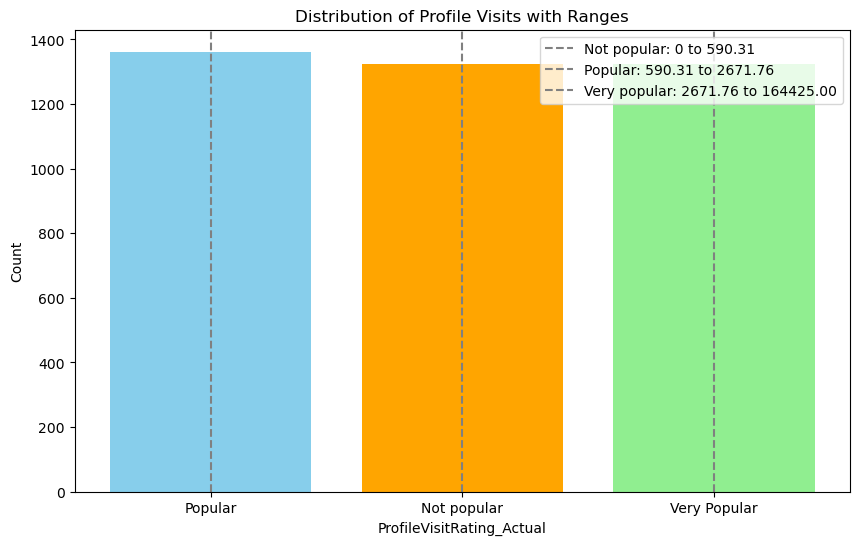

In [88]:
category_counts = df['ProfileVisitRating_Actual'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color=['skyblue', 'orange', 'lightgreen'])

# Annotate the plot with ranges
plt.axvline(x=0, color='grey', linestyle='--', label=f'Not popular: 0 to {low_threshold:.2f}')
plt.axvline(x=1, color='grey', linestyle='--', label=f'Popular: {low_threshold:.2f} to {medium_threshold:.2f}')
plt.axvline(x=2, color='grey', linestyle='--', label=f'Very popular: {medium_threshold:.2f} to {high_threshold:.2f}')

plt.xlabel('ProfileVisitRating_Actual')
plt.ylabel('Count')
plt.title('Distribution of Profile Visits with Ranges')
plt.legend(loc='upper right')
plt.xticks(rotation=0)  # Rotates x-axis labels to be horizontal
plt.show()

<Figure size 1000x600 with 0 Axes>

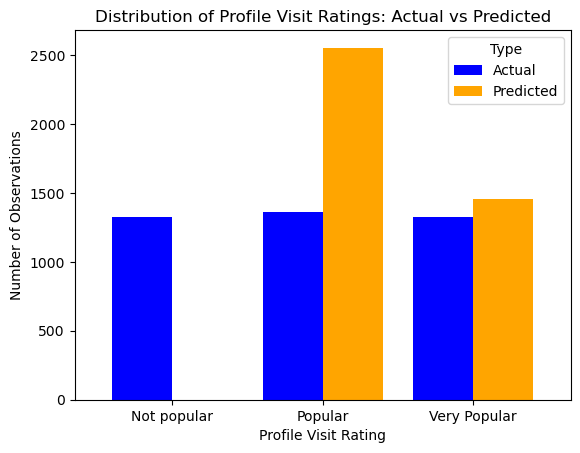

In [97]:
actual_counts = df['ProfileVisitRating_Actual'].value_counts().sort_index()
predicted_counts = df['ProfileVisitRating_Predicted'].value_counts().sort_index()

# Create a DataFrame for plotting
ratings_df = pd.DataFrame({
    'Rating': actual_counts.index,
    'Actual': actual_counts.values,
    'Predicted': predicted_counts.values
})

plt.figure(figsize=(10, 6))

# Plot the grouped bar plot
ratings_df.plot(x='Rating', kind='bar', stacked=False, color=['blue', 'orange'], width=0.8)

# Customize the plot
plt.title('Distribution of Profile Visit Ratings: Actual vs Predicted')
plt.xlabel('Profile Visit Rating')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='Type', loc='upper right')
plt.show()